<a href="https://colab.research.google.com/github/monicaluo-nyush/Data-Bootcamp-Final/blob/main/DB_Final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
#taken form UCI website to import data
from ucimlrepo import fetch_ucirepo

# fetch dataset
thoracic_surgery_data = fetch_ucirepo(id=277)

# data (as pandas dataframes)
X = thoracic_surgery_data.data.features
y = thoracic_surgery_data.data.targets

# metadata
print(thoracic_surgery_data.metadata)

# variable information
print(thoracic_surgery_data.variables)


{'uci_id': 277, 'name': 'Thoracic Surgery Data', 'repository_url': 'https://archive.ics.uci.edu/dataset/277/thoracic+surgery+data', 'data_url': 'https://archive.ics.uci.edu/static/public/277/data.csv', 'abstract': 'The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 470, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age'], 'target_col': ['Risk1Yr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Z60N', 'creators': ['Marek Lubicz', 'Konrad Pawelczyk', 'Adam Rzechonek', 'Jerzy Kolodziej'], 'intro_paper': {'ID': 290, 'type': 'NATIVE', 'title': 'Boosted SVM for extracting rules from imb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#easier to EDA when X and y are in the same table
combined_data = pd.concat([X, y], axis=1)
y.name = 'Outcome'
combined_data = pd.concat([X, y], axis=1)
print(combined_data.head())

    DGN  PRE4  PRE5  PRE6 PRE7 PRE8 PRE9 PRE10 PRE11 PRE14 PRE17 PRE19 PRE25  \
0  DGN2  2.88  2.16  PRZ1    F    F    F     T     T  OC14     F     F     F   
1  DGN3  3.40  1.88  PRZ0    F    F    F     F     F  OC12     F     F     F   
2  DGN3  2.76  2.08  PRZ1    F    F    F     T     F  OC11     F     F     F   
3  DGN3  3.68  3.04  PRZ0    F    F    F     F     F  OC11     F     F     F   
4  DGN3  2.44  0.96  PRZ2    F    T    F     T     T  OC11     F     F     F   

  PRE30 PRE32  AGE Risk1Yr  
0     T     F   60       F  
1     T     F   51       F  
2     T     F   59       F  
3     F     F   54       F  
4     T     F   73       T  


In [5]:
#scale Data
# Replace binary values ('T', 'F') with 1 and 0, T is have or died, F is no have/survived
binary_columns = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32','Risk1Yr']
combined_data[binary_columns] = combined_data[binary_columns].replace({'T': 1, 'F': 0})
#things from a scale
combined_data['PRE6'] = combined_data['PRE6'].map({'PRZ0': 0, 'PRZ1': 1, 'PRZ2': 2})
combined_data['PRE14'] = combined_data['PRE14'].map({'OC11': 11, 'OC12': 12, 'OC13': 13, 'OC14': 14})
#renaming columns to what they mean
combined_data = combined_data.rename(columns={'PRE7': 'Pain_Before_Surgery', 'PRE8': 'Coughint_Blood', 'PRE9': 'Shortness_Breath', 'PRE10': 'Cough', 'PRE11': 'Phy_Weakness'})
combined_data = combined_data.rename(columns={'PRE14': 'OG_tumor_size', 'PRE17': 'Type2Diabetes', 'PRE19': 'Heart_attack_6months', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma'})
combined_data = combined_data.rename(columns={'PRE6': 'Activity_Scale'})


<ipython-input-5-b5ee98190da5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data[binary_columns] = combined_data[binary_columns].replace({'T': 1, 'F': 0})


In [6]:
combined_data['DGN'].unique()
combined_data['DGN'] = combined_data['DGN'].map({'DGN1': 1, 'DGN2': 2, 'DGN3': 3, 'DGN4': 4, 'DGN5': 5, 'DGN6': 6, 'DGN8': 8})

In [7]:
combined_data.describe()

,DGN,PRE4,PRE5,Activity_Scale,Pain_Before_Surgery,Coughint_Blood,Shortness_Breath,Cough,Phy_Weakness,OG_tumor_size,Type2Diabetes,Heart_attack_6months,PAD,Smoking,Asthma,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


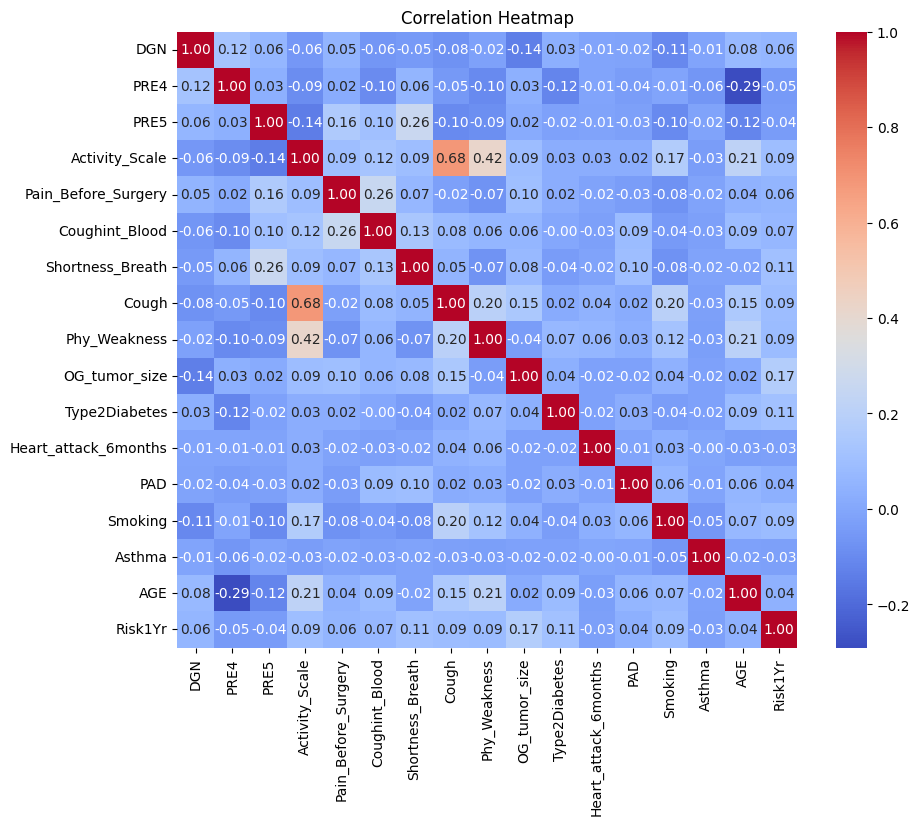

In [8]:
#correlation heatmap
correlation_matrix = combined_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
combo_counts = combined_data.groupby(['Activity_Scale', 'Cough']).size().reset_index(name='Counts')

print(combo_counts)

   Activity_Scale  Cough  Counts
0               0      0     113
1               0      1      17
2               1      0      33
3               1      1     280
4               2      0       1
5               2      1      26


In [14]:
combo_counts = combined_data.groupby(['Activity_Scale', 'Coughint_Blood']).size().reset_index(name='Counts')

print(combo_counts)

   Activity_Scale  Coughint_Blood  Counts
0               0               0     119
1               0               1      11
2               1               0     263
3               1               1      50
4               2               0      20
5               2               1       7


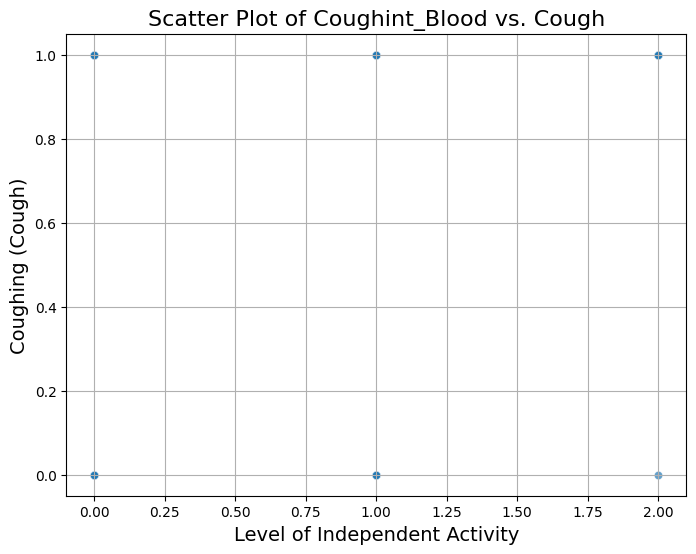

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_data, x='Activity_Scale', y='Cough', alpha=0.7)

plt.title("Scatter Plot of Coughint_Blood vs. Cough", fontsize=16)
plt.xlabel("Level of Independent Activity", fontsize=14)
plt.ylabel("Coughing (Cough)", fontsize=14)
plt.grid(True)

plt.show()

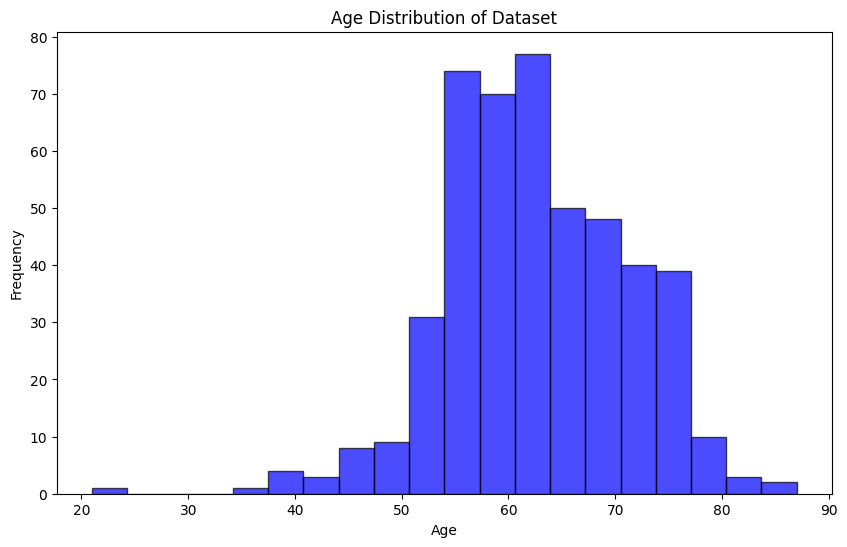

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(combined_data['AGE'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution of Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

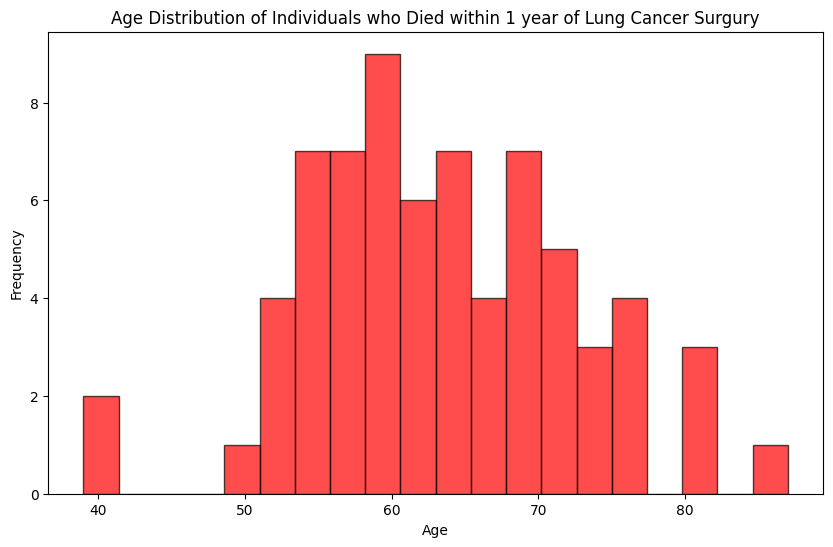

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(combined_data[combined_data['Risk1Yr'] == 1]['AGE'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Age Distribution of Individuals who Died within 1 year of Lung Cancer Surgury')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

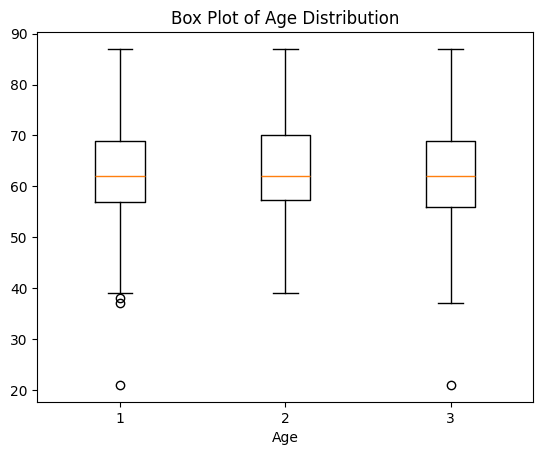

In [11]:
all_ages = combined_data['AGE']
lung_cancer = combined_data[combined_data['Risk1Yr'] == 1]['AGE']
no_lung_cancer = combined_data[combined_data['Risk1Yr'] == 0]['AGE']

plt.boxplot([all_ages, lung_cancer, no_lung_cancer])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

In [12]:
combined_data["Risk1Yr"].value_counts(normalize = True)

,proportion
Risk1Yr,
0,0.851064
1,0.148936


In [9]:
Died = combined_data[combined_data['Risk1Yr'] == 1]
Lived = combined_data[combined_data['Risk1Yr'] == 0]

In [10]:
Died.describe()

,DGN,PRE4,PRE5,Activity_Scale,Pain_Before_Surgery,Coughint_Blood,Shortness_Breath,Cough,Phy_Weakness,OG_tumor_size,Type2Diabetes,Heart_attack_6months,PAD,Smoking,Asthma,AGE,Risk1Yr
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.0,70.000000,70.0
mean,3.200000,3.185143,3.364857,0.900000,0.100000,0.200000,0.128571,0.785714,0.242857,12.028571,0.142857,0.0,0.028571,0.900000,0.0,63.342857,1.0
std,1.001448,0.757218,8.239355,0.542405,0.302166,0.402888,0.337142,0.413289,0.431906,0.867638,0.352454,0.0,0.167802,0.302166,0.0,9.107865,0.0
min,2.000000,2.000000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.0,0.000000,0.000000,0.0,39.000000,1.0
25%,3.000000,2.640000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.250000,0.000000,0.0,0.000000,1.000000,0.0,57.250000,1.0
50%,3.000000,3.040000,2.260000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.0,0.000000,1.000000,0.0,62.000000,1.0
75%,3.000000,3.660000,2.900000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.0,0.000000,1.000000,0.0,70.000000,1.0
max,8.000000,4.960000,71.100000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,0.0,1.000000,1.000000,0.0,87.000000,1.0


In [12]:
Lived.describe()


,DGN,PRE4,PRE5,Activity_Scale,Pain_Before_Surgery,Coughint_Blood,Shortness_Breath,Cough,Phy_Weakness,OG_tumor_size,Type2Diabetes,Heart_attack_6months,PAD,Smoking,Asthma,AGE,Risk1Yr
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0
mean,3.077500,3.298525,4.779375,0.760000,0.060000,0.135000,0.055000,0.670000,0.152500,11.685000,0.062500,0.005000,0.015000,0.807500,0.005000,62.392500,0.0
std,0.661504,0.889646,12.277582,0.532079,0.237784,0.342152,0.228266,0.470802,0.359955,0.657156,0.242365,0.070622,0.121705,0.394757,0.070622,8.638867,0.0
min,1.000000,1.440000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.0
25%,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000,0.0
50%,3.000000,3.160000,2.440000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.0
75%,3.000000,3.840000,3.120000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.0
max,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,0.0


In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DGN                   470 non-null    int64  
 1   PRE4                  470 non-null    float64
 2   PRE5                  470 non-null    float64
 3   Activity_Scale        470 non-null    int64  
 4   Pain_Before_Surgery   470 non-null    int64  
 5   Coughint_Blood        470 non-null    int64  
 6   Shortness_Breath      470 non-null    int64  
 7   Cough                 470 non-null    int64  
 8   Phy_Weakness          470 non-null    int64  
 9   OG_tumor_size         470 non-null    int64  
 10  Type2Diabetes         470 non-null    int64  
 11  Heart_attack_6months  470 non-null    int64  
 12  PAD                   470 non-null    int64  
 13  Smoking               470 non-null    int64  
 14  Asthma                470 non-null    int64  
 15  AGE                   4

In [15]:
value_counts_normalized_binary = Died.apply(
    lambda col: col.value_counts(normalize=True) if col.dtype.name == 'int64' and col.nunique() == 2 else None
)

print(value_counts_normalized_binary)

DGN                                                                  None
PRE4                                                                 None
PRE5                                                                 None
Activity_Scale                                                       None
Pain_Before_Surgery     Pain_Before_Surgery
0    0.9
1    0.1
Name: pr...
Coughint_Blood          Coughint_Blood
0    0.8
1    0.2
Name: proport...
Shortness_Breath        Shortness_Breath
0    0.871429
1    0.128571
N...
Cough                   Cough
1    0.785714
0    0.214286
Name: propor...
Phy_Weakness            Phy_Weakness
0    0.757143
1    0.242857
Name:...
OG_tumor_size                                                        None
Type2Diabetes           Type2Diabetes
0    0.857143
1    0.142857
Name...
Heart_attack_6months                                                 None
PAD                     PAD
0    0.971429
1    0.028571
Name: proporti...
Smoking                 Smoking
1    0

In [16]:
Died['Asthma'].unique()
Died['Heart_attack_6months'].unique()


array([0])

In [17]:
value_counts_normalized = Lived.apply(
    lambda col: col.value_counts(normalize=True) if col.dtype.name == 'int64' and col.nunique() == 2 else None
)

print(value_counts_normalized)

DGN                                                                  None
PRE4                                                                 None
PRE5                                                                 None
Activity_Scale                                                       None
Pain_Before_Surgery     Pain_Before_Surgery
0    0.94
1    0.06
Name: ...
Coughint_Blood          Coughint_Blood
0    0.865
1    0.135
Name: pro...
Shortness_Breath        Shortness_Breath
0    0.945
1    0.055
Name: p...
Cough                   Cough
1    0.67
0    0.33
Name: proportion, dt...
Phy_Weakness            Phy_Weakness
0    0.8475
1    0.1525
Name: pro...
OG_tumor_size                                                        None
Type2Diabetes           Type2Diabetes
0    0.9375
1    0.0625
Name: pr...
Heart_attack_6months    Heart_attack_6months
0    0.995
1    0.005
Nam...
PAD                     PAD
0    0.985
1    0.015
Name: proportion, dt...
Smoking                 Smoking
1    0

In [18]:
value_counts_normalized_all = combined_data.apply(
    lambda col: col.value_counts(normalize=True) if col.dtype.name == 'int64' and col.nunique() == 2 else None
)

print(value_counts_normalized_all)

DGN                                                                  None
PRE4                                                                 None
PRE5                                                                 None
Activity_Scale                                                       None
Pain_Before_Surgery     Pain_Before_Surgery
0    0.934043
1    0.06595...
Coughint_Blood          Coughint_Blood
0    0.855319
1    0.144681
Nam...
Shortness_Breath        Shortness_Breath
0    0.934043
1    0.065957
N...
Cough                   Cough
1    0.687234
0    0.312766
Name: propor...
Phy_Weakness            Phy_Weakness
0    0.834043
1    0.165957
Name:...
OG_tumor_size                                                        None
Type2Diabetes           Type2Diabetes
0    0.925532
1    0.074468
Name...
Heart_attack_6months    Heart_attack_6months
0    0.995745
1    0.0042...
PAD                     PAD
0    0.982979
1    0.017021
Name: proporti...
Smoking                 Smoking
1    0

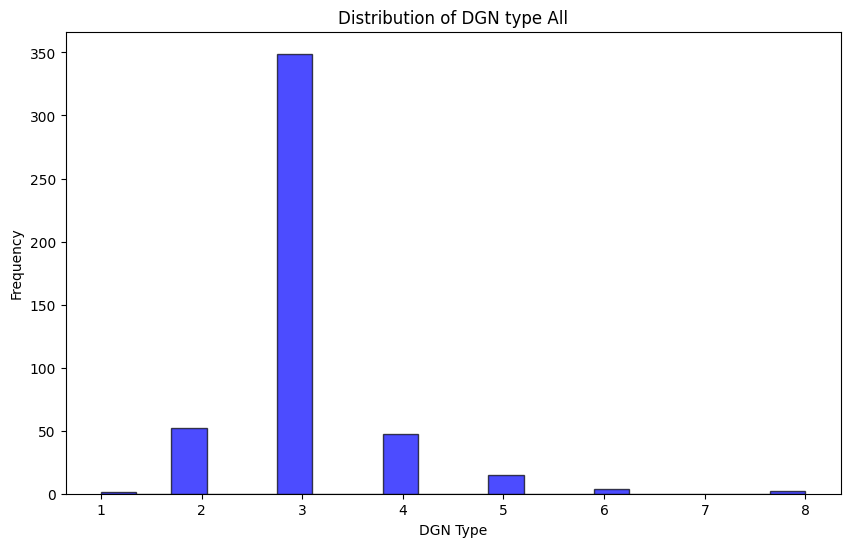

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(combined_data['DGN'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of DGN type All')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.show()

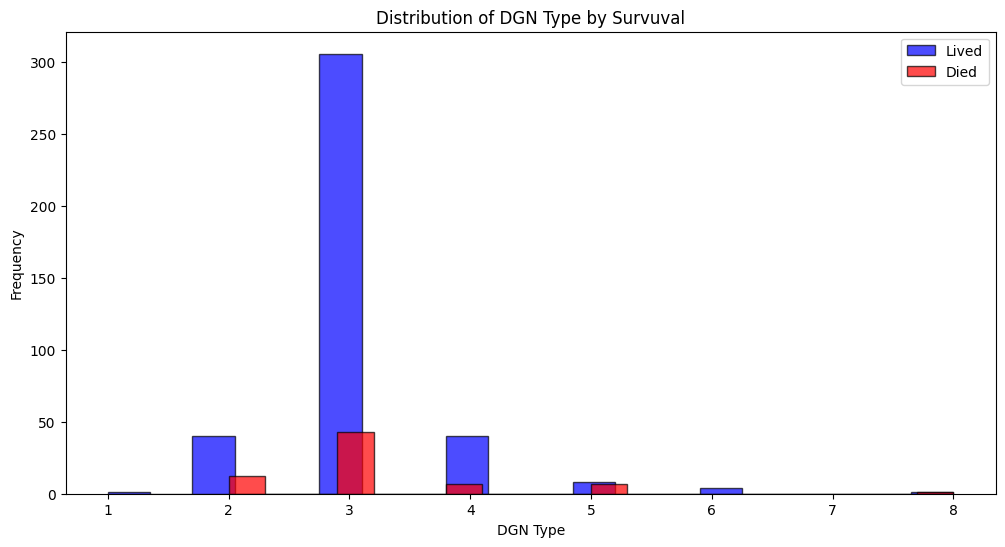

In [20]:
risk0_data = combined_data[combined_data['Risk1Yr'] == 0]['DGN']
risk1_data = combined_data[combined_data['Risk1Yr'] == 1]['DGN']

plt.figure(figsize=(12, 6))
plt.hist(risk0_data, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Lived')
plt.hist(risk1_data, bins=20, color='red', alpha=0.7, edgecolor='black', label='Died')
plt.title('Distribution of DGN Type by Survuval')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

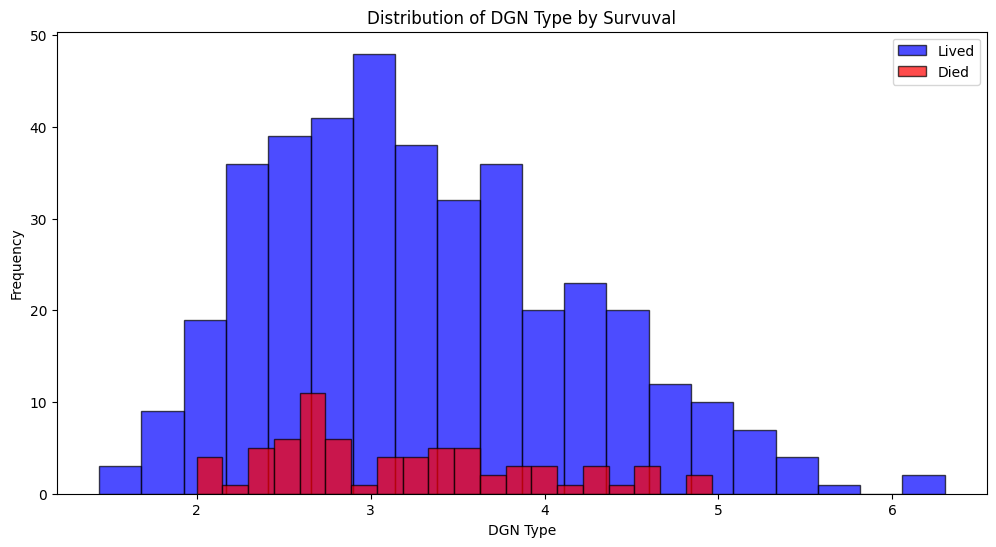

In [21]:
risk0_data_4 = combined_data[combined_data['Risk1Yr'] == 0]['PRE4']
risk1_data_4 = combined_data[combined_data['Risk1Yr'] == 1]['PRE4']

plt.figure(figsize=(12, 6))
plt.hist(risk0_data_4, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Lived')
plt.hist(risk1_data_4, bins=20, color='red', alpha=0.7, edgecolor='black', label='Died')
plt.title('Distribution of PRE4 by Survuval')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

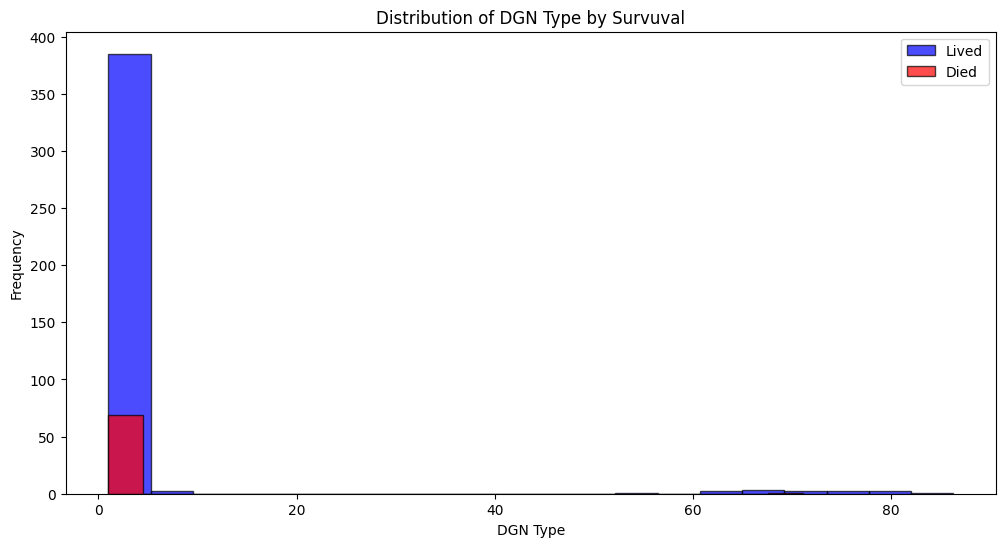

In [22]:
risk0_data_5 = combined_data[combined_data['Risk1Yr'] == 0]['PRE5']
risk1_data_5 = combined_data[combined_data['Risk1Yr'] == 1]['PRE5']

plt.figure(figsize=(12, 6))
plt.hist(risk0_data_5, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Lived')
plt.hist(risk1_data_5, bins=20, color='red', alpha=0.7, edgecolor='black', label='Died')
plt.title('Distribution of PRE5 by Survuval')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

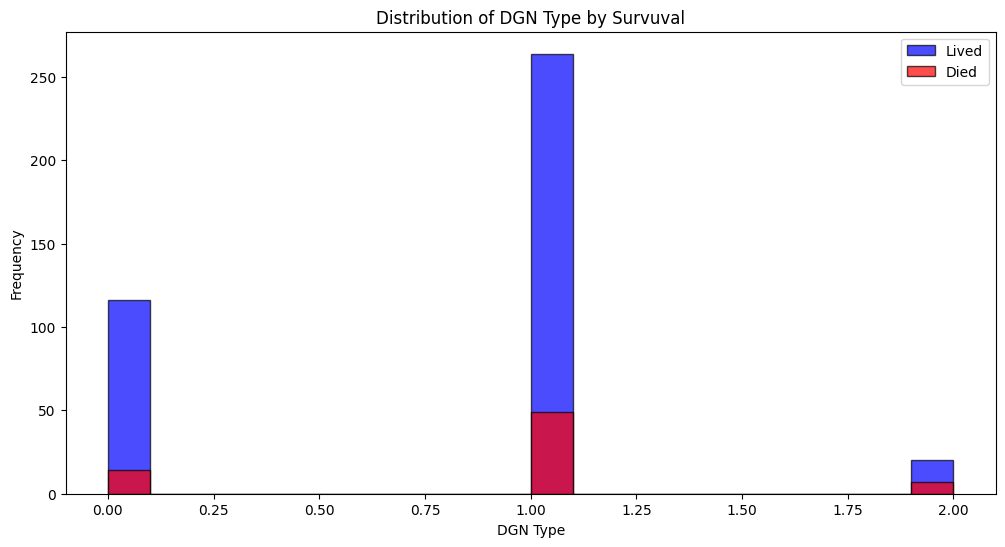

In [23]:
risk0_data_Active = combined_data[combined_data['Risk1Yr'] == 0]['Activity_Scale']
risk1_data_Active = combined_data[combined_data['Risk1Yr'] == 1]['Activity_Scale']

plt.figure(figsize=(12, 6))
plt.hist(risk0_data_Active, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Lived')
plt.hist(risk1_data_Active, bins=20, color='red', alpha=0.7, edgecolor='black', label='Died')
plt.title('Distribution of Activity Level by Survuval')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

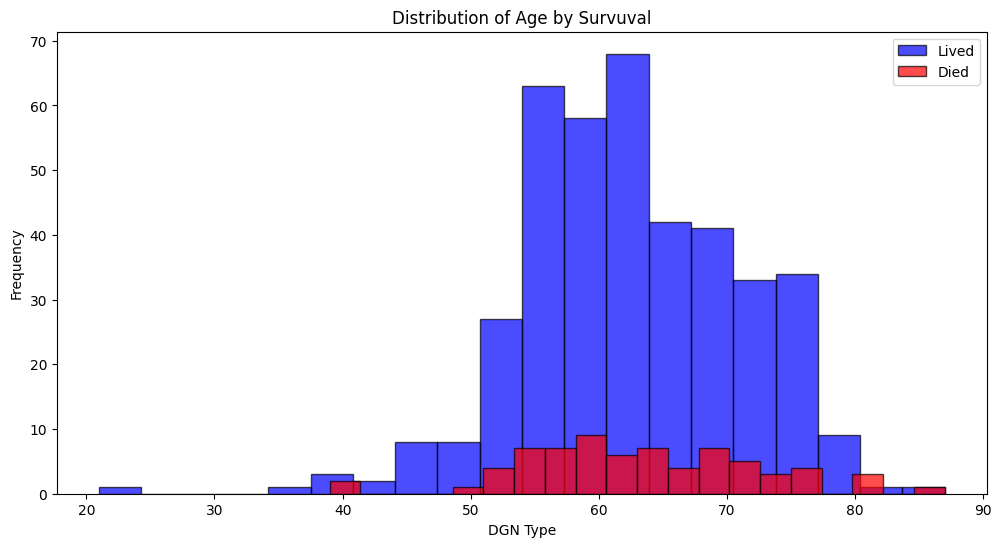

In [11]:
risk0_data_Age = combined_data[combined_data['Risk1Yr'] == 0]['AGE']
risk1_data_Age = combined_data[combined_data['Risk1Yr'] == 1]['AGE']

plt.figure(figsize=(12, 6))
plt.hist(risk0_data_Age, bins=20, color='blue', alpha=0.7, edgecolor='black', label='Lived')
plt.hist(risk1_data_Age, bins=20, color='red', alpha=0.7, edgecolor='black', label='Died')
plt.title('Distribution of Age by Survuval')
plt.xlabel('DGN Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [30]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = combined_data.drop(columns=['Risk1Yr'])
y = combined_data['Risk1Yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt')

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance analysis
importances = rf_clf.feature_importances_
feature_names = X.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.8617021276595744

Feature Importances:
DGN: 0.0783
PRE4: 0.1860
PRE5: 0.2061
Activity_Scale: 0.0535
Pain_Before_Surgery: 0.0178
Coughint_Blood: 0.0339
Shortness_Breath: 0.0322
Cough: 0.0310
Phy_Weakness: 0.0263
OG_tumor_size: 0.0879
Type2Diabetes: 0.0291
Heart_attack_6months: 0.0000
PAD: 0.0082
Smoking: 0.0291
Asthma: 0.0001
AGE: 0.1806

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        80
           1       1.00      0.07      0.13        14

    accuracy                           0.86        94
   macro avg       0.93      0.54      0.53        94
weighted avg       0.88      0.86      0.81        94



In [14]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [31]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.8069692124789897

In [37]:
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

Log Loss: 4.98476057509067


In [17]:
#RandomForestClassifier w/ grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Accuracy on Train Set:", grid_search.best_score_)


best_rf_clf = grid_search.best_estimator_
y_pred_best = best_rf_clf.predict(X_test)
print("Test Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))

importances = rf_clf.feature_importances_
feature_names = X.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

report = classification_report(y_test, y_pred_best)
print("\nClassification Report:")
print(report)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy on Train Set: 0.8510877192982458
Test Accuracy with Best Model: 0.851063829787234

Feature Importances:
DGN: 0.0753
PRE4: 0.2010
PRE5: 0.2102
Activity_Scale: 0.0436
Pain_Before_Surgery: 0.0182
Coughint_Blood: 0.0334
Shortness_Breath: 0.0308
Cough: 0.0259
Phy_Weakness: 0.0244
OG_tumor_size: 0.0807
Type2Diabetes: 0.0252
Heart_attack_6months: 0.0000
PAD: 0.0087
Smoking: 0.0263
Asthma: 0.0002
AGE: 0.1961

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
logloss = log_loss(y_test, y_pred_best)
print("Log Loss:", logloss)

Log Loss: 5.368203696251491


In [33]:
f1_b = f1_score(y_test, y_pred_best, average='weighted')
print("F1 Score:", f1_b)

F1 Score: 0.7825874296894105


In [19]:
#Ridige Classifier
from sklearn.linear_model import RidgeClassifier
X = pd.get_dummies(X, drop_first=True)

ridge_clf = RidgeClassifier(alpha=1.0, random_state=42)
ridge_clf.fit(X_train, y_train)

y_pred_r = ridge_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_r, average='weighted')
print("F1 Score:", f1)

report = classification_report(y_test, y_pred_r)
print("\nClassification Report:")
print(report)

Accuracy: 0.851063829787234
F1 Score: 0.7825874296894105

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
logloss = log_loss(y_test, y_pred_r)
print("Log Loss:", logloss)

Log Loss: 5.368203696251491


In [34]:
#SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svc = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))

f1 = f1_score(y_test, y_pred_svc, average='weighted')
print("F1 Score:", f1)


report = classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(report)

Accuracy: 0.851063829787234
F1 Score: 0.7825874296894105

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
logloss = log_loss(y_test, y_pred_svc)
print("Log Loss:", logloss)

Log Loss: 5.368203696251491


In [26]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier


In [27]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
num_classes = len(y.unique())
model = xgb.XGBClassifier(objective='multi:softprob', num_class=num_classes, random_state=42, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_multi = y_test.values

f1 = f1_score(y_test_multi, y_pred_proba.argmax(axis=1), average='weighted')
print("F1 Score:", f1)

logloss = log_loss(y_test_multi, y_pred_proba)
print("Log Loss:", logloss)

from sklearn.metrics import classification_report
report = classification_report(y_test_multi, y_pred_proba.argmax(axis=1))
print("\nClassification Report:")
print(report)

F1 Score: 0.7584005172657655
Log Loss: 0.665933216293633

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        80
           1       0.17      0.14      0.15        14

    accuracy                           0.77        94
   macro avg       0.51      0.51      0.51        94
weighted avg       0.75      0.77      0.76        94



Model: Random Forest, F1 Score: 0.8070, Improvement over Baseline: 0.0244
Model: Random Forest w/ Grid Search, F1 Score: 0.7826, Improvement over Baseline: 0.0000
Model: Ridge Classifier, F1 Score: 0.7826, Improvement over Baseline: 0.0000
Model: SVC, F1 Score: 0.7826, Improvement over Baseline: 0.0000
Model: XGBoost, F1 Score: 0.7584, Improvement over Baseline: -0.0242


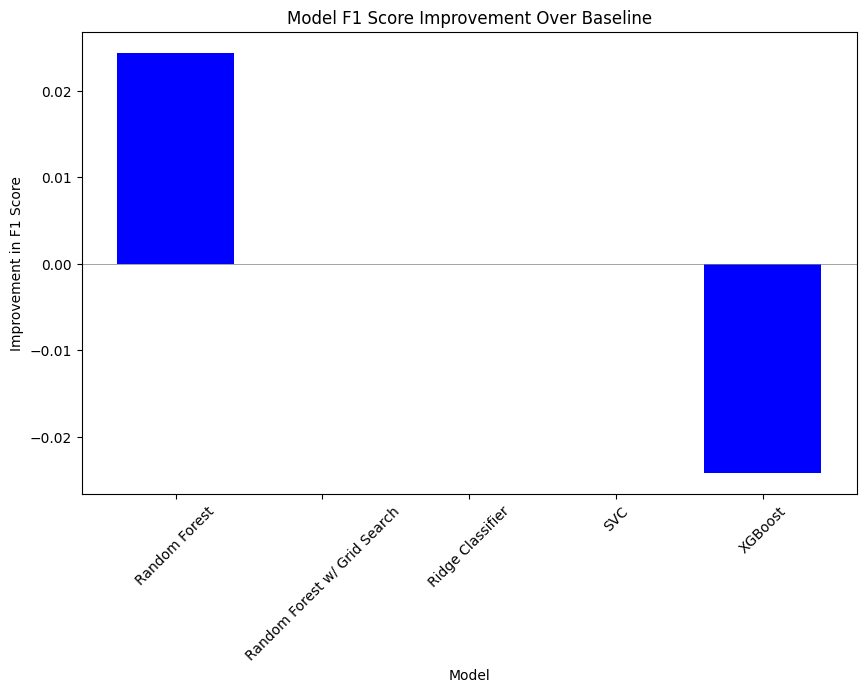

In [36]:
N = len(y_test)
y_pred_baseline = np.zeros(N)
baseline_f1 = f1_score(y_test, y_pred_baseline, average='weighted')
f1_scores = {
    'Random Forest': f1_score(y_test, y_pred, average='weighted'),
    'Random Forest w/ Grid Search': f1_score(y_test, y_pred_best, average='weighted'),
    'Ridge Classifier': f1_score(y_test, y_pred_r, average='weighted'),
    'SVC': f1_score(y_test, y_pred_svc, average='weighted'),
    'XGBoost': f1_score(y_test_multi, y_pred_proba.argmax(axis=1), average='weighted')
}

# Comparison of F1 scores with the baseline
comparison = {model: f1 - baseline_f1 for model, f1 in f1_scores.items()}

# Output the comparison
for model, improvement in comparison.items():
    print(f"Model: {model}, F1 Score: {f1_scores[model]:.4f}, Improvement over Baseline: {improvement:.4f}")

# Optionally, create a plot for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(comparison.keys(), comparison.values(), color=['blue', 'orange', 'green', 'red'])
plt.axhline(0, color='grey', linewidth=0.5)
plt.title('Model F1 Score Improvement Over Baseline')
plt.xlabel('Model')
plt.ylabel('Improvement in F1 Score')
plt.xticks(rotation=45)
plt.show()

In [32]:
baseline_f1

0.7825874296894105

In [29]:
logloss = log_loss(y_test, y_pred_baseline)
print("Log Loss:", logloss)

Log Loss: 5.368203696251491


In [38]:
csv_file_path = 'combined_data.csv'
combined_data.to_csv(csv_file_path, index=False)
print(f"Data successfully exported to {csv_file_path}")

Data successfully exported to combined_data.csv
